In [1]:
import requests
from bs4 import BeautifulSoup
import pandas

In [2]:
result = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density")
content = result.content
soup=BeautifulSoup(content, "html.parser")

By analyzing the HTML code, I found that the first table with class=sortable is the one I want

I converted the fields, and created a dict to make things easier. We would also have used a list

In [3]:
table = soup.find('table',attrs={"class":"sortable"})

my_dict = {}

#I got the table that I want...
#Now I will navigate:
# For each row (<tr>), I will get the <td>s. 
for tr in table.findAll("tr"):
    td_list = tr.findAll("td")

    # JUST MAKING SURE THAT I AM GETTING THE TRs WITH TDs (not the THS)
    if (len(td_list) > 0):

        ### I USED THE EXISTENCE OF AN IMAGE (FLAG) TO FILTER THE LINES I WANT
        if(len(td_list[1].findAll("img")) > 0):

            ##Looking at the table I want the 2nd, 3rd, 4th, and 5th columns
            ### I know that se second column (second position in my list with the tds)
            country_name = td_list[1].text.strip()
            #for each field, I curated the numbers to remove the ',' so it is possible to convert to float/int
            areakm = td_list[2].text.replace(',','')
            areami = td_list[3].text.replace(',','')
            population = td_list[4].text.replace(',','')
            #created a dictionary to make it easier to work
            my_dict[country_name] = {'area_km2': float(areakm),
                                     'area_mi2': float(areami),  
                                     'population': int(population)  
            }

### Exercise 2
* It is facilitated because I converted the fields as I was scraping.

In [4]:
# THis is the magical function I used to come from a dict to a dataframe
# the parameter orient. If dict keys are row, you use index. If the dict keys are columns, you don't need the param.
df = pandas.DataFrame.from_dict(my_dict, orient= 'index')
df

,area_km2,area_mi2,population
Abkhazia,8660.00,3344.00,243206
Afghanistan,645807.00,249347.00,31575018
Albania,28703.00,11082.00,2862427
Algeria,2381741.00,919595.00,42545964
American Samoa (US),197.00,76.00,56700
Andorra,464.00,179.00,76177
Angola,1246700.00,481354.00,29250009
Anguilla (UK),96.00,37.00,13452
Antigua and Barbuda,442.00,171.00,104084
Argentina,2780400.00,1073518.00,44938712


### Exercise 3
* Summarizing our data

In [5]:
df.describe()

,area_km2,area_mi2,population
count,2.500000e+02,2.500000e+02,2.500000e+02
mean,5.454655e+05,2.106154e+05,3.047842e+07
std,1.719106e+06,6.637473e+05,1.282811e+08
min,4.400000e-01,1.700000e-01,5.600000e+01
25%,1.686550e+03,7.362500e+02,2.634935e+05
50%,6.493100e+04,2.507000e+04,4.578766e+06
75%,3.533760e+05,1.364390e+05,1.765074e+07
max,1.712524e+07,6.612093e+06,1.399881e+09


### Exercise 4
* Creating the correlation matrix

In [6]:
df.corr(method='pearson').style.background_gradient(cmap='coolwarm')

,area_km2,area_mi2,population
area_km2,1,1,0.458636
area_mi2,1,1,0.458635
population,0.458636,0.458635,1


### Exercise 5
* Scatterplot 

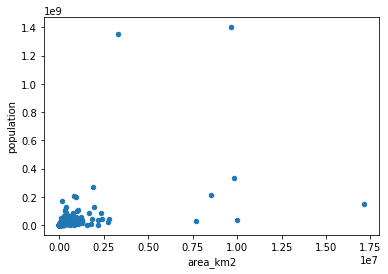

In [7]:
df.plot.scatter(x = "area_km2", y = "population")